In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

### import italy-covid-daywise.csv which contains day-wise Covid-19 data for Italy 

In [4]:
df = pd.read_csv("italy-covid-daywise.csv")

### retrieve the number of rows and columns in the data frame

In [4]:
df.shape

(248, 4)

### view statistical information for numerical columns

In [5]:
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


### view some basic information about the data frame like data types, and number of non-nulls 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


### create a list of columns within the data frame

In [10]:
list(df.columns)

['date', 'new_cases', 'new_deaths', 'new_tests']

### return only the days which had more than 1000 reported cases

In [8]:
df[df["new_cases"] > 1000]["date"]

68     2020-03-08
69     2020-03-09
70     2020-03-10
72     2020-03-12
73     2020-03-13
          ...    
241    2020-08-28
242    2020-08-29
243    2020-08-30
244    2020-08-31
247    2020-09-03
Name: date, Length: 72, dtype: object

### create positive_rate column that is equal to new_cases / new_tests

In [11]:
df["positive_rate"] = df["new_cases"] / df["new_tests"]
df.head(3)

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN


### let's remove the positive_rate column

In [13]:
df.drop(columns="positive_rate", inplace=True)

In [14]:
df.head(3)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN


### sort to identify the days with the highest number of cases

In [16]:
df.sort_values(by=["new_cases"],ascending=False) 

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


### check the data type of date column, then convert it into a datetime

In [20]:
df["date"].dtypes

dtype('O')

In [27]:
df["date"] = pd.to_datetime(df["date"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        248 non-null    datetime64[ns]
 1   new_cases   248 non-null    float64       
 2   new_deaths  248 non-null    float64       
 3   new_tests   135 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.9 KB


### extract different parts (day, month, weekday, and year) of the date column into separate columns

In [48]:
df["weekday"] = df["date"].dt.weekday
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df.head(5)

,date,new_cases,new_deaths,new_tests,weekday,year,month,day
0,2019-12-31,0.0,0.0,NaN,1,2019,12,31
1,2020-01-01,0.0,0.0,NaN,2,2020,1,1
2,2020-01-02,0.0,0.0,NaN,3,2020,1,2
3,2020-01-03,0.0,0.0,NaN,4,2020,1,3
4,2020-01-04,0.0,0.0,NaN,5,2020,1,4


### check the overall metrics for May (i.e, the total numbers of 'new_cases', 'new_deaths', 'new_tests')

In [59]:
df[df["month"]==3][["new_cases","new_deaths","new_tests"]].sum()

new_cases     100851.0
new_deaths     11570.0
new_tests          0.0
dtype: float64

### which day seems like have more cases?

In [72]:
df.sort_values(by = ["new_cases"],ascending=False)["date"][0]

Timestamp('2019-12-31 00:00:00')

### create a new dataframe with month-wise data

In [83]:
k = df.groupby("month")
k.head()

,date,new_cases,new_deaths,new_tests,weekday,year,month,day
0,2019-12-31,0.0,0.0,NaN,1,2019,12,31
1,2020-01-01,0.0,0.0,NaN,2,2020,1,1
2,2020-01-02,0.0,0.0,NaN,3,2020,1,2
3,2020-01-03,0.0,0.0,NaN,4,2020,1,3
4,2020-01-04,0.0,0.0,NaN,5,2020,1,4
5,2020-01-05,0.0,0.0,NaN,6,2020,1,5
32,2020-02-01,0.0,0.0,NaN,5,2020,2,1
33,2020-02-02,0.0,0.0,NaN,6,2020,2,2
34,2020-02-03,0.0,0.0,NaN,0,2020,2,3
35,2020-02-04,0.0,0.0,NaN,1,2020,2,4


### plot a line graph showing how the number of daily cases varies over time.

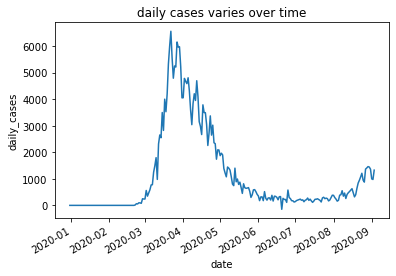

In [91]:
plt.plot(df["date"],df["new_cases"])
plt.xlabel("date")
plt.ylabel("daily_cases")
plt.title("daily cases varies over time")
plt.gcf().autofmt_xdate()
